In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data dictionary
```
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
3 age: age in years
4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
```

# Missing age

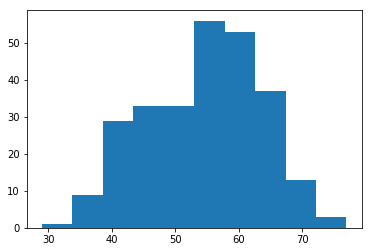

In [106]:
df = pd.read_csv('heart-missing-age.csv')

plt.hist(df[df['age'].isnull() == False].age)
plt.show()

In [107]:
# Function to load all histograms
def plot_hist_all_columns(df, cols):
    fig = plt.figure(figsize=(15, 12))

    # loop over all vars (total: 34)
    for i in cols:
        plt.subplot(6, 6, i+1)
        f = plt.gca()
#         f.axes.get_yaxis().set_visible(False)
#         f.axes.set_ylim([0, df.shape[0]])

        vals = np.size(df.iloc[:, i].unique())
        if vals < 10:
            bins = vals
        else:
            vals = 10

        plt.hist(df.iloc[:, i], bins=30)
        plt.title(df.columns[i])

    plt.tight_layout()

## Missing Age: all other columns without filters

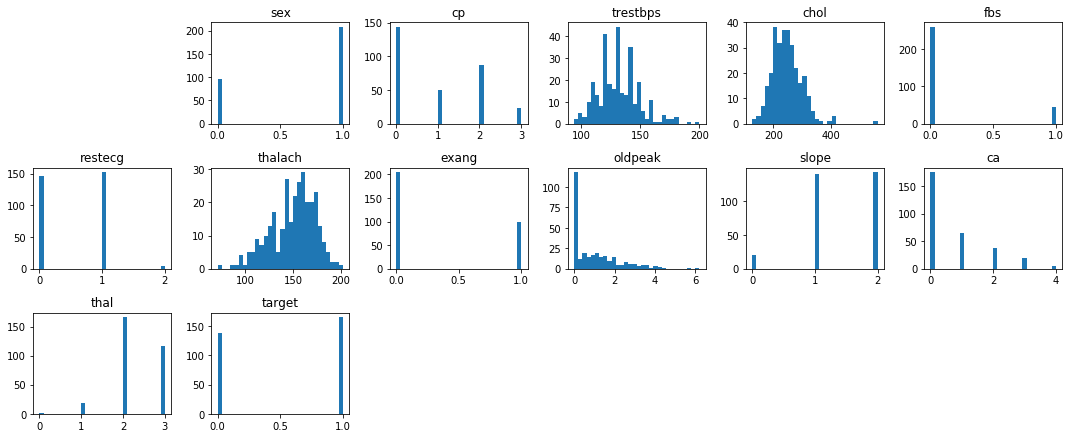

In [108]:
cols = list(range(1, df.shape[1]))
plot_hist_all_columns(df, cols)

## Missing Age: only rows where age is missing

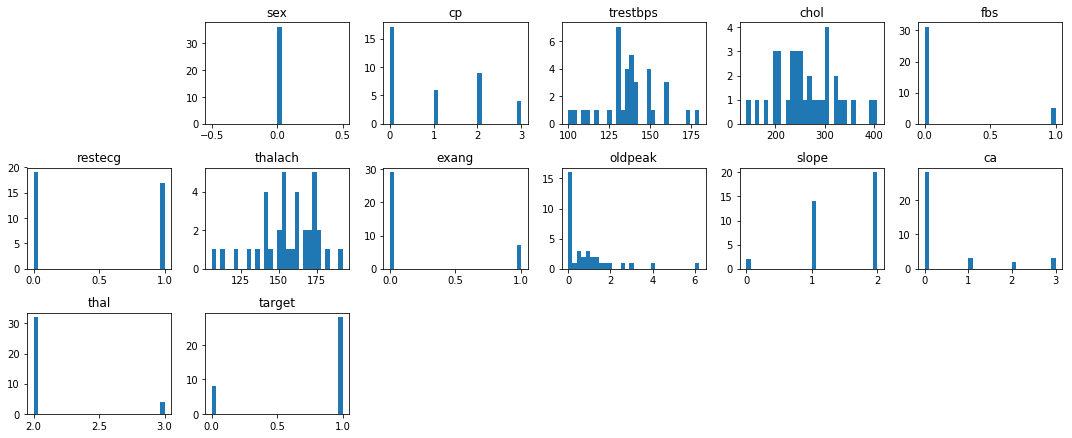

In [109]:
plot_hist_all_columns(df[df['age'].isnull()], cols)

## Missing Age: only rows where age is not missing

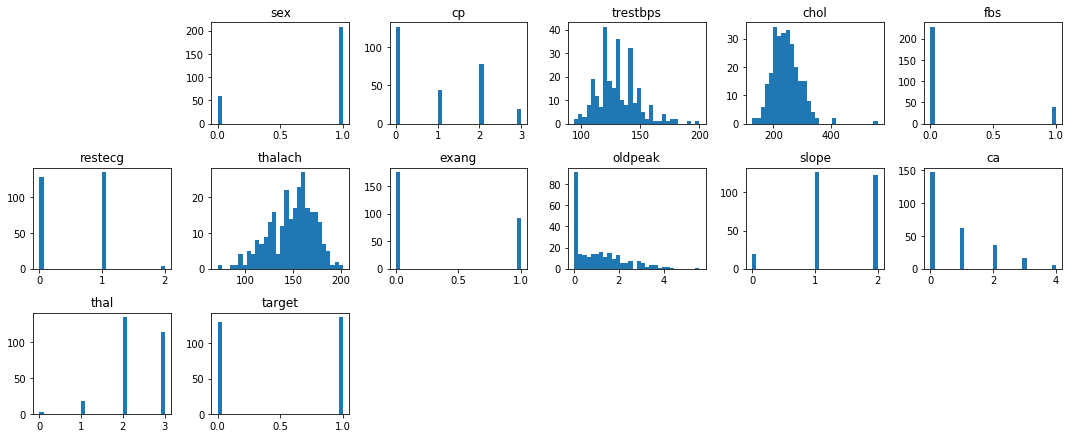

In [110]:
plot_hist_all_columns(df[df['age'].isnull() == False], cols)

# Missing cholesterol

In [117]:
df = pd.read_csv('heart-missing-chol.csv')

## Histograms: All rows

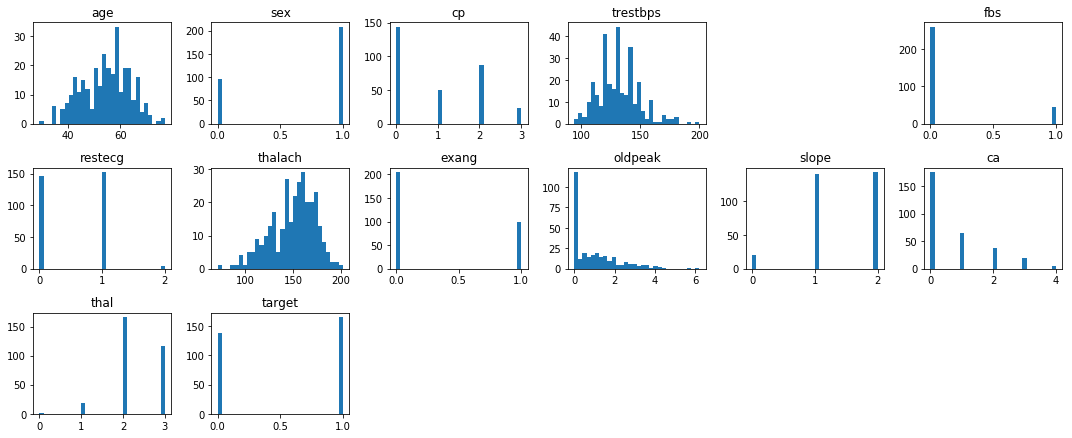

In [113]:
cols = list(range(df.shape[1]))
cols.pop(4) # remove the cholesterol because it has nans
plot_hist_all_columns(df, cols)

## Histograms: Only rows where cholesterol is missing

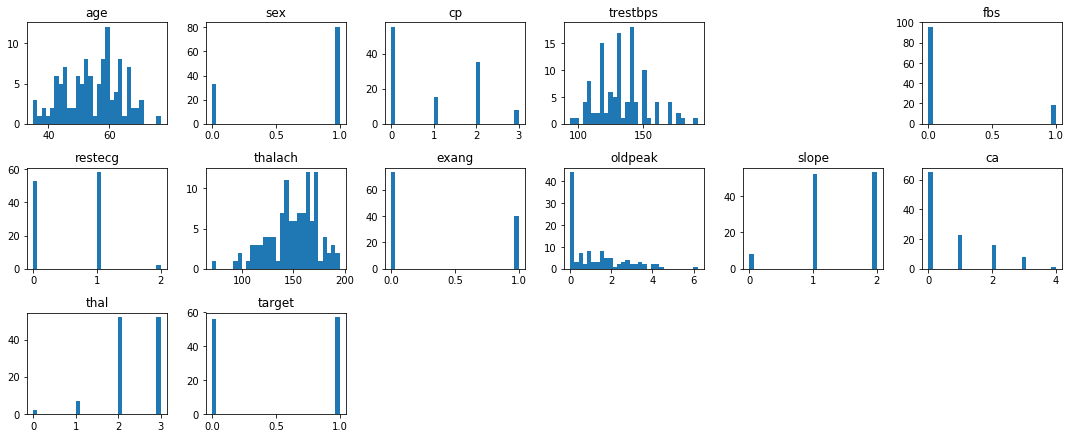

In [114]:
plot_hist_all_columns(df[df['chol'].isnull()], cols)

## Histograms: Only rows where cholesterol is not missing

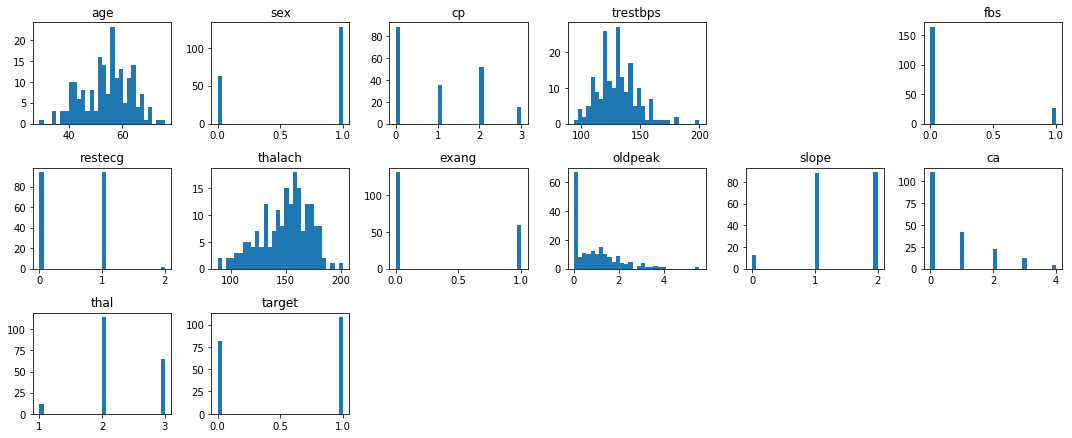

In [115]:
plot_hist_all_columns(df[df['chol'].isnull() == False], cols)

# Missing sex

In [120]:
df = pd.read_csv('heart-missing-sex.csv')

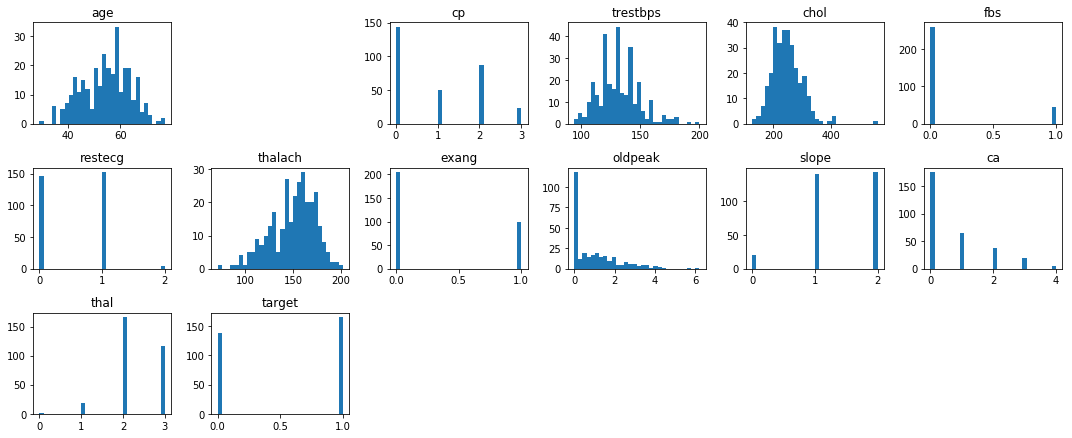

In [122]:
cols = list(range(df.shape[1]))
cols.pop(1) # remove the sex because it has nans
plot_hist_all_columns(df, cols)

## Histograms: Only rows where sex is missing

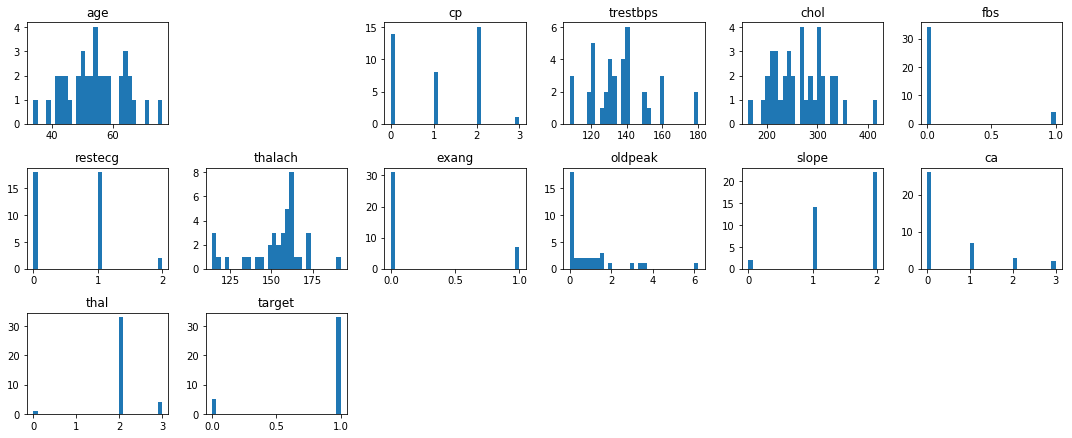

In [123]:
plot_hist_all_columns(df[df['sex'].isnull()], cols)

## Histograms: Only rows where sex is not missing

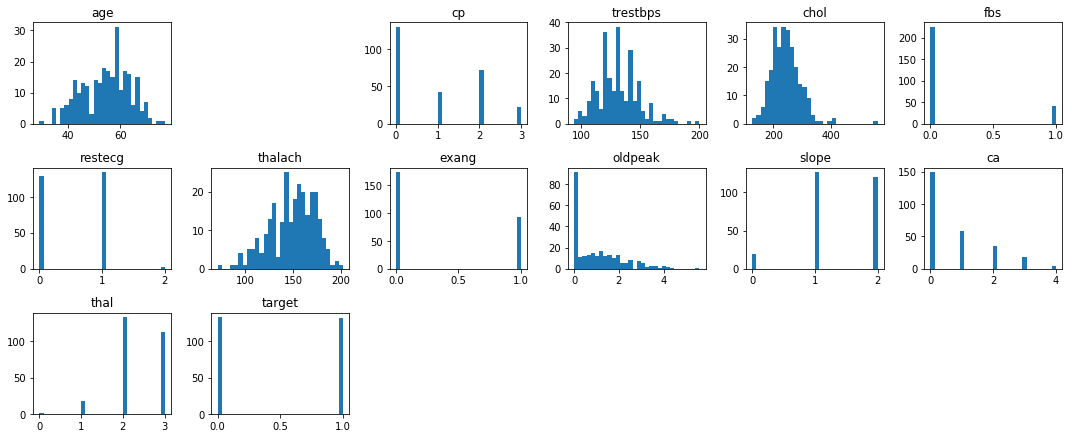

In [124]:
plot_hist_all_columns(df[df['sex'].isnull() == False], cols)